# <h1><center>AVALAÇÃO #3 DINÂMICA ESTRUTURAL - 2020 </center></h1>

#### Nome: Alessadro Melo de Oliveira - 10788662
#### Nome: Guilherme Beppu de Souza - 10696681

In [1178]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [1179]:
rho_al = 2700
E_al = 70 * 1e9
L_barra = 500*1e-3
b_barra = 25.4*1e-3
h_barra = 3.175*1e-3
I_barra = (b_barra*h_barra**4)/12

a_fu = 85*1e-3
rho_aco = 7830

a_tur = 48*1e-3

rho_ny = 1150
Eny = 3000*1e6

## a)

In [1180]:
M = np.array([[0.8659, 0,0], [0, 4.8086, 0], [0,0,0.8659]])
K = 113.8133 * np.array([[1, -1,0], [-1, 2, -1], [0,-1,1]])

## b)

In [1181]:
from scipy import linalg

wn_1= np.real(linalg.eig(K,M)[0][0])
wn_2= np.real(linalg.eig(K,M)[0][1])
wn_3= np.real(linalg.eig(K,M)[0][2])

In [1182]:
## Resolvendo pelo polinômio
lambda_x = sp.Symbol('lambda')

eq = (sp.Matrix(K - lambda_x*M)).det()

In [1183]:
# V1 = linalg.eig(K,M)[1][:,0]/max(linalg.eig(K,M)[1][:,0])
# V2 = linalg.eig(K,M)[1][:,1]/max(linalg.eig(K,M)[1][:,1])
# V3 = linalg.eig(K,M)[1][:,2]/max(linalg.eig(K,M)[1][:,2])

V1 = linalg.eig(K,M)[1][:,0]
V2 = linalg.eig(K,M)[1][:,1]
V3 = linalg.eig(K,M)[1][:,2]

## c)

In [1184]:
auto_vec = [V1,V2,V3]

print("Condição de Ortogonalidade para [M]")
for i in auto_vec:
    for j in V1,V2,V3:
        if i.sum() != j.sum():
            orto_M = np.matmul(np.matmul(i,M),j)
            print(orto_M)
            
print("Condição de Ortogonalidade para [k]")
for i in auto_vec:
    for j in V1,V2,V3:
        if i.sum() != j.sum():
            orto_K = np.matmul(np.matmul(i,K),j)
            print(orto_K)

Condição de Ortogonalidade para [M]
1.6653345369377348e-16
2.220446049250313e-16
1.6653345369377348e-16
-5.551115123125783e-17
3.3306690738754696e-16
0.0
Condição de Ortogonalidade para [k]
-1.2197434323822188e-14
7.299589974503889e-14
0.0
-7.105427357601002e-15
7.815970093361102e-14
0.0


## d)

In [1185]:
#Constantes elásticas dos fios para cada comprimento
k_fio_1 = 188.496
k_fio_2 = 117.994
k_fio_3 = 376.991
k_fio_4 = 753.820

#Matriz de rigidez para cada fio
k = 113.8133
K_1= np.array([[k + k_fio_1,-k,0],[-k,k+k,-k],[0,-k,k+k_fio_1]])
K_2= np.array([[k + k_fio_2,-k,0],[-k,k+k,-k],[0,-k,k+k_fio_2]])
K_3= np.array([[k + k_fio_3,-k,0],[-k,k+k,-k],[0,-k,k+k_fio_3]])
K_4= np.array([[k + k_fio_4,-k,0],[-k,k+k,-k],[0,-k,k+k_fio_4]])

In [1186]:
#Autovalores

#Para k_fio_1
lambda_1_1= np.real(linalg.eig(K_1,M)[0][0])
lambda_2_1= np.real(linalg.eig(K_1,M)[0][1])
lambda_3_1= np.real(linalg.eig(K_1,M)[0][2])

#Para k_fio_2
lambda_1_2= np.real(linalg.eig(K_2,M)[0][0])
lambda_2_2= np.real(linalg.eig(K_2,M)[0][1])
lambda_3_2= np.real(linalg.eig(K_2,M)[0][2])


#Para k_fio_3
lambda_1_3= np.real(linalg.eig(K_3,M)[0][0])
lambda_2_3= np.real(linalg.eig(K_3,M)[0][1])
lambda_3_3= np.real(linalg.eig(K_3,M)[0][2])


#Para k_fio_4
lambda_1_4= np.real(linalg.eig(K_4,M)[0][0])
lambda_2_4= np.real(linalg.eig(K_4,M)[0][1])
lambda_3_4= np.real(linalg.eig(K_4,M)[0][2])

In [1187]:
#Frequências naturais

#Para k_fio_1
wn_1_1 = np.sqrt(lambda_1_1)
wn_2_1 = np.sqrt(lambda_2_1)
wn_3_1 = np.sqrt(lambda_3_1)

#Para k_fio_2
wn_1_2 = np.sqrt(lambda_1_2)
wn_2_2 = np.sqrt(lambda_2_2)
wn_3_2 = np.sqrt(lambda_3_2)

#Para k_fio_3
wn_1_3 = np.sqrt(lambda_1_3)
wn_2_3 = np.sqrt(lambda_2_3)
wn_3_3 = np.sqrt(lambda_3_3)

#Para k_fio_4
wn_1_4 = np.sqrt(lambda_1_4)
wn_2_4 = np.sqrt(lambda_2_4)
wn_3_4 = np.sqrt(lambda_3_4)

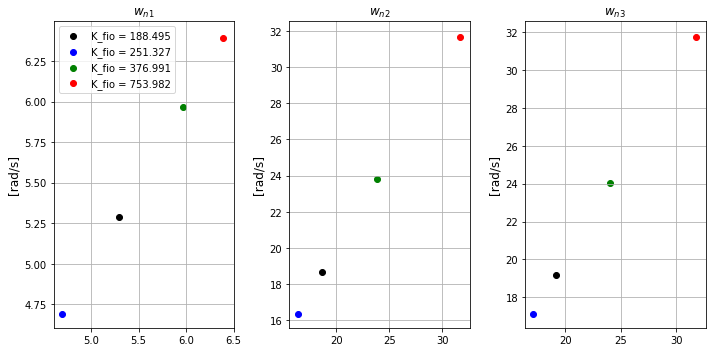

In [1188]:
fig_frequencias = plt.figure(figsize=(10,5))

fig_auto_1 = fig_frequencias.add_subplot(131)
plt.scatter(wn_1_1, wn_1_1, color = 'k', label = "K_fio = 188.495")
plt.scatter(wn_1_2, wn_1_2, color = 'b', label = "K_fio = 251.327")
plt.scatter(wn_1_3, wn_1_3, color = 'g', label = "K_fio = 376.991")
plt.scatter(wn_1_4, wn_1_4, color = 'r', label = "K_fio = 753.982")
plt.grid()
plt.legend()
plt.title("${w_n}_1$")
plt.ylabel("[rad/s]",fontsize=12)


fig_auto_2 = fig_frequencias.add_subplot(132)
plt.scatter(wn_2_1, wn_2_1, color = 'k')
plt.scatter(wn_2_2, wn_2_2, color = 'b')
plt.scatter(wn_2_3, wn_2_3, color = 'g')
plt.scatter(wn_2_4, wn_2_4, color = 'r')
plt.grid()
plt.title("${w_n}_2$")
plt.ylabel("[rad/s]", fontsize=12)

fig_auto_3 = fig_frequencias.add_subplot(133)
plt.scatter(wn_3_1, wn_3_1, color = 'k')
plt.scatter(wn_3_2, wn_3_2, color = 'b')
plt.scatter(wn_3_3, wn_3_3, color = 'g')
plt.scatter(wn_3_4, wn_3_4, color = 'r')
plt.grid()
plt.title("${w_n}_3$")
plt.ylabel("[rad/s]", fontsize=12)


plt.tight_layout()
#plt.savefig("frequencias_naturais_nao_amortecidas.eps")
plt.show()

In [1189]:
#Autovetores
#Para k_fio_1
V1_1 = linalg.eig(K_1,M)[1][:,0]
V2_1 = linalg.eig(K_1,M)[1][:,1]
V3_1 = linalg.eig(K_1,M)[1][:,2]

#Para k_fio_2
V1_2 = linalg.eig(K_2,M)[1][:,0]
V2_2 = linalg.eig(K_2,M)[1][:,1]
V3_2 = linalg.eig(K_2,M)[1][:,2]

#Para k_fio_3
V1_3 = linalg.eig(K_3,M)[1][:,0]
V2_3 = linalg.eig(K_3,M)[1][:,1]
V3_3 = linalg.eig(K_3,M)[1][:,2]

#Para k_fio_4
V1_4 = linalg.eig(K_4,M)[1][:,0]
V2_4 = linalg.eig(K_4,M)[1][:,1]
V3_4 = linalg.eig(K_4,M)[1][:,2]

## e)

In [1190]:
alpha, beta = sp.symbols('alpha beta')
C = alpha*M + beta*K_3

In [1191]:
#Pelo método polinômio
eq = sp.Matrix(K_3 - lambda_x*M)
eq.det()

22432.8145954821*lambda + (240888.86089849*(1 - 0.00176424697175636*lambda)**2)*(227.6266 - 4.8086*lambda) - 12715234.8591816

In [1192]:
#Autovalores
lambda_1= np.real(linalg.eig(K_3,M)[0][0])
lambda_2= np.real(linalg.eig(K_3,M)[0][1])
lambda_3= np.real(linalg.eig(K_3,M)[0][2])

In [1193]:
#Frequencias naturais
wn_1 = np.sqrt(lambda_1)
wn_2 = np.sqrt(lambda_2)
wn_3 = np.sqrt(lambda_3)

In [1194]:
#Autovetores
V1 = linalg.eig(K_3,M)[1][:,0]
V2 = linalg.eig(K_3,M)[1][:,1]
V3 = linalg.eig(K_3,M)[1][:,2]

In [1195]:
#Matriz com os modos de vibrar
U = sp.zeros(3,3)
U[:,0] = V1
U[:,1] = V2
U[:,2] = V3
U[1,1] = 0

In [1196]:
#Matrizes diagonalizadas

m = sp.Matrix(np.matmul(np.matmul((U.T),M),U))
for i in range(3):
    for j in range(3):
        if i==j:
            m[i,j]=m[i,j]
        else:
            m[i,j]=0
            
k = sp.Matrix(np.matmul(np.matmul((U.T),K_3),U))
for i in range(3):
    for j in range(3):
        if i==j:
            k[i,j]=k[i,j]
        else:
            k[i,j]=0

c = sp.Matrix(np.matmul(np.matmul((U.T),C),U))
for i in range(3):
    for j in range(3):
        if i==j:
            c[i,j]=c[i,j]
        else:
            c[i,j]=0


In [1197]:
#Matriz [M] diagonalizada
m.evalf(5)

Matrix([
[4.3785,      0,       0],
[     0, 0.8659,       0],
[     0,      0, 0.88149]])

In [1198]:
#Matriz [K] diagonalizada
m.evalf(5)

Matrix([
[4.3785,      0,       0],
[     0, 0.8659,       0],
[     0,      0, 0.88149]])

In [1199]:
#Matriz [C] diagonalizada
c.subs({alpha:0.05, beta:0.05}).evalf(5)

Matrix([
[8.0179,      0,      0],
[     0, 24.583,      0],
[     0,      0, 25.542]])

In [1200]:
zeta_1 = (alpha + beta*wn_1**2)/(2*wn_1)
zeta_2 = (alpha + beta*wn_2**2)/(2*wn_2)
zeta_3 = (alpha + beta*wn_3**2)/(2*wn_3)

In [1201]:
alphas = np.linspace(0,0.1,100)
betas = np.linspace(0,0.1,100)

zetas_1= [zeta_1.subs({alpha:i, beta:j}) for i,j in zip(alphas,betas)]
zetas_2= [zeta_2.subs({alpha:i, beta:j}) for i,j in zip(alphas,betas)]
zetas_3= [zeta_3.subs({alpha:i, beta:j}) for i,j in zip(alphas,betas)]

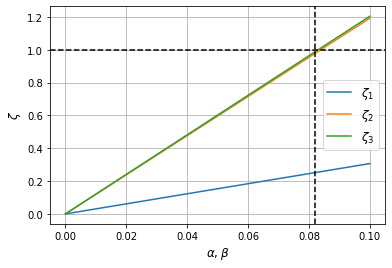

In [1202]:
fig = plt.figure()
plt.plot(alphas,zetas_1, label = "$\zeta_1$")
plt.plot(alphas,zetas_2, label = "$\zeta_2$")
plt.plot(alphas,zetas_3, label = "$\zeta_3$")
plt.grid()
plt.xlabel("$\\alpha, \\beta$", fontsize=12)
plt.ylabel("$\zeta$", fontsize=12)
plt.legend(fontsize=12)
plt.axhline(1, ls = '--', color = 'k')
plt.axvline(0.082, ls = '--', color = 'k')
#plt.savefig("zetas.eps")

## f)

In [1203]:
from sympy.functions import exp

f0, w, i ,t = sp.symbols('f_0 omega i t')

from sympy.physics.vector import dynamicsymbols
n1,n2,n3 = dynamicsymbols('eta_1 eta_2 eta_3')

In [1204]:
c = sp.Matrix(c).subs({alpha:0.05, beta:0.05})
m = sp.Matrix(m)
k = sp.Matrix(k)

F = sp.Matrix([f0 * exp(w*i*t),0,0])
N = sp.Matrix(np.matmul(U.T, F))

In [1205]:
#Equações de movimento desacopladas
eq1 = m[0,0]*n1.diff(t,2) + c[0,0]*n1.diff(t,1) + k[0,0]*n1 - N[0]
eq2 = m[1,1]*n2.diff(t,2) + c[1,1]*n2.diff(t,1) + k[1,1]*n2 - N[1]
eq3 = m[2,2]*n3.diff(t,2) + c[2,2]*n3.diff(t,1) + k[2,2]*n3 - N[2]

#Equações de movimento desacopladas e normalizadas

eq1_n = (m[0,0]*n1.diff(t,2) + c[0,0]*n1.diff(t,1) + k[0,0]*n1 - N[0])/m[0,0]
eq2_n = (m[1,1]*n2.diff(t,2) + c[1,1]*n2.diff(t,1) + k[1,1]*n2 - N[1])/m[1,1]
eq3_n = (m[2,2]*n3.diff(t,2) + c[2,2]*n3.diff(t,1) + k[2,2]*n3 - N[2])/m[2,2]

In [1206]:
zeta1 = zeta_1.subs({alpha:0.05, beta:0.05})
zeta2 = zeta_2.subs({alpha:0.05, beta:0.05})
zeta3 = zeta_3.subs({alpha:0.05, beta:0.05})

In [1207]:
w = sp.Symbol('omega')

In [1208]:
H = (((U[:,0]*U[:,0].T)/(M[0,0] * (wn_1**2 - w**2 + 1j*2*zeta1*wn_1*w)))+
    ((U[:,1]*U[:,1].T)/(M[1,1] * (wn_2**2 - w**2 + 1j*2*zeta2*wn_2*w)))+
    ((U[:,2]*U[:,2].T)/(M[2,2] * (wn_3**2 - w**2 + 1j*2*zeta3*wn_3*w))))

In [1209]:
H

Matrix([
[0.498022448114933/(-0.8659*omega**2 + 25.0906378974602*I*omega + 500.946857949203) + 0.0545483216380631/(-0.8659*omega**2 + 1.58563964070064*I*omega + 30.8468928140127) + 0.500000000000004/(-4.8086*omega**2 + 136.519535957963*I*omega + 2725.58211915926), -0.0443816455546916/(-0.8659*omega**2 + 25.0906378974602*I*omega + 500.946857949203) + 0.220447914145278/(-0.8659*omega**2 + 1.58563964070064*I*omega + 30.8468928140127),              0.498022448114942/(-0.8659*omega**2 + 25.0906378974602*I*omega + 500.946857949203) + 0.0545483216380631/(-0.8659*omega**2 + 1.58563964070064*I*omega + 30.8468928140127) - 0.5/(-4.8086*omega**2 + 136.519535957963*I*omega + 2725.58211915926)],
[                                                                                    -0.0443816455546916/(-0.8659*omega**2 + 25.0906378974602*I*omega + 500.946857949203) + 0.220447914145278/(-0.8659*omega**2 + 1.58563964070064*I*omega + 30.8468928140127), 0.00395510377011702/(-0.8659*omega**2 + 25.0906378974

## g)

In [1210]:
#Código para imprimir comandos para plotar a matriz F no MATLAB
def pega_elemento(X):
    
    print("syms w")
    print("")
    
    for i in np.arange(0,3):
        for j in np.arange(0,3):
            
            name = "H{}{}".format(i,j)
            
            retorna = str(X[i,j])
            retorna = retorna.replace('I', '1i')
            retorna = retorna.replace('omega', 'w')
            retorna = retorna.replace('**', '^')
            print("%% {}".format(name))
            print(name + "=" +retorna+";")
            
            separados = str(X[i,j]).split(")")[0:-1]
            separados = [item.replace('I', '1i') for item in separados]
            separados = [item.replace('omega', 'w') for item in separados]
            separados = [item.replace('**', '^') for item in separados]
            
            print("xx = 2*3.1415*linspace(0,20,1000);")  
            print("")
            print("figure()")
            print("subplot(2,1,1)")
            print("hold on")
            print("plot(xx, abs(subs({},w,xx)), 'k', 'LineWidth',1.5)".format(name))
            
            for r in separados:
                print("plot(xx, abs(subs({}),w,xx)), '--')".format(r))
                
            print("xlabel('Frequência [Hertz]')")
            print("ylabel('Magnitude [m/N]')")
            print("set(gca, 'YScale', 'log')")
            print("xlim([0 120])")
            print("title('Magnitude [{}]')".format(name))
            print("grid on")

            print("")
            print("subplot(2,1,2)")
            print("hold on")
            print("plot(xx, 180/pi * angle(subs({},w,xx)), 'k', 'LineWidth',1.5)".format(name))
            
            for r in separados:
                print("plot(xx, 180/pi * angle(subs({}),w,xx)),'--')".format(r))
            
            
            print("xlabel('Frequência [Hertz]')")
            print("ylabel('Fase [º]')")
            print("title('Fase [{}]')".format(name))
            print("xlim([0 120])")
            print("grid on")
            
            print("ax = gca;")
            print("outerpos = ax.OuterPosition;")
            print("ti = ax.TightInset; ")
            print("left = outerpos(1) + ti(1);")
            print("bottom = outerpos(2) + ti(2);")
            print("ax_width = outerpos(3) - ti(1) - ti(3);")
            print("ax_height = outerpos(4) - ti(2) - ti(4);")
            print("ax.Position = [left bottom ax_width ax_height];")
            print("fig = gcf;")
            print("fig.PaperPositionMode = 'auto'")
            print("fig_pos = fig.PaperPosition;")
            print("fig.PaperSize = [fig_pos(3) fig_pos(4)];")
            print("")
            print("print(fig,'{}','-dpdf')".format(name))
            print("")
#pega_elemento(H)